<a href="https://colab.research.google.com/github/Mariyyah-Alrasheed/6_Week/blob/main/Copy_of_OCR_Practice_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OCR Practice Exercise

In this exercise, you will work on Optical Character Recognition (OCR) using the Keras OCR library.
Your task is to detect and recognize text from images. This notebook will guide you through the process of setting up the environment, loading and preprocessing images, applying the OCR model, and displaying the results.

## Objectives
- Set up the environment and install necessary libraries.
- Load and preprocess images for OCR.
- Apply the Keras OCR model to detect and recognize text.
- Display and analyze the OCR results.

This exercise is designed to help you understand the OCR pipeline, from image preprocessing to text recognition, and prepare you for the practical exam.
The example image can be found under `Datasets/OCR_Example`.

## Install Libraries

In [62]:
!pip install tensorflow==2.9.1 keras==2.9.0

  Using cached tensorflow-2.9.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.0 kB)
  Using cached keras-2.9.0-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl.metadata (872 bytes)
  Using cached gast-0.4.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl.metadata (1.9 kB)
  Using cached protobuf-3.19.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (787 bytes)
  Using cached tensorboard-2.9.1-py3-none-any.whl.metadata (1.9 kB)
  Using cached tensorflow_estimator-2.9.0-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl.metadata (2.7 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-manylinux2010_x86_64.whl.metadata (1.1 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl.metadata (873 bytes)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━

In [1]:
!apt-get update
!apt-get install -y tesseract-ocr

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Ign:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading pack

In [2]:
# !pip install tensorflow==2.9.1 keras==2.9.0

In [3]:
!pip install pytesseract
!pip install easyocr
!pip install keras-ocr

## Import necessary libraries
In this step, you can import these libraries to help you:
- `keras_ocr`
- `matplotlib.pyplot`
- `keras_ocr.pipeline.Pipeline`
- `opencv`
- `numpy`

You can use any other libraries

In [4]:
import cv2
import easyocr
import keras_ocr
import pytesseract
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

## Download and visualize sample image
Here we will be downloading the image for OCR.

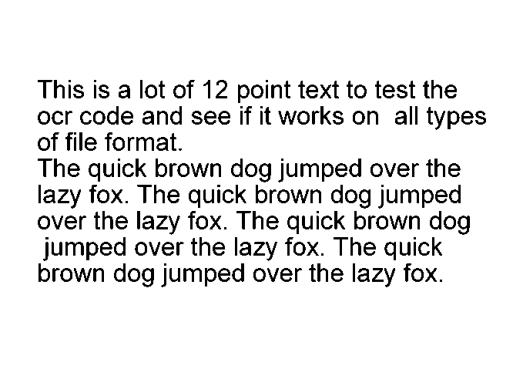

In [5]:
image_path = '/content/OCR_example.png'
image = cv2.imread(image_path)

org_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(org_image)

## Preprocess the image
This step involves converting the images into a format suitable for OCR, using OpenCV and standard preprocessing techniques such as resizing and color conversion.

### Convert to grayscale

In [6]:
gray_image = cv2.cvtColor(org_image, cv2.COLOR_BGR2GRAY)

### Remove noise

In [7]:
den_image = cv2.medianBlur(gray_image, 5)

### Sharpen the image

In [8]:
kernel = np.array([[0, -1, 0], [-1, 5, -1,], [0, -1, 0]])
Sharpen_img = cv2.filter2D(den_image, -1, kernel)

### Binarize the image

In [9]:
bin_img = cv2.threshold(Sharpen_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

## Display preprocessed images
Display the preprocessed images .

In [10]:
def img_dis(img, title):
  plt.imshow(img, cmap='gray')
  plt.title(title)
  plt.axis('off')
  plt.show()

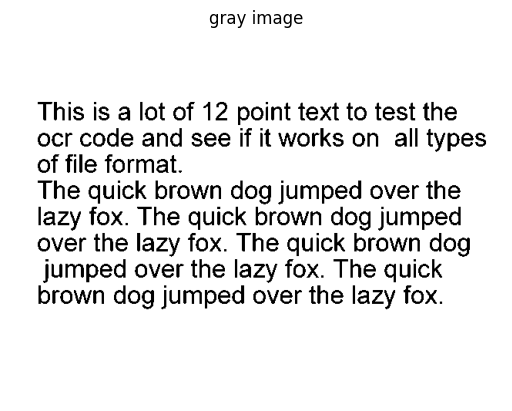

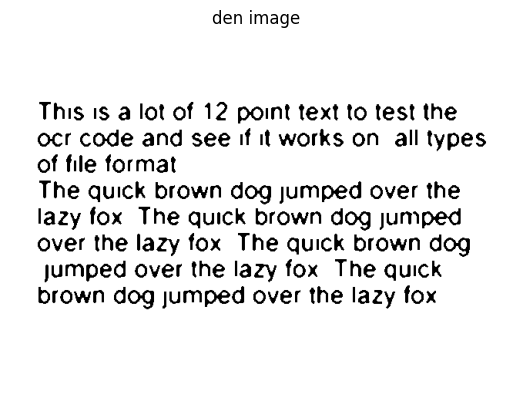

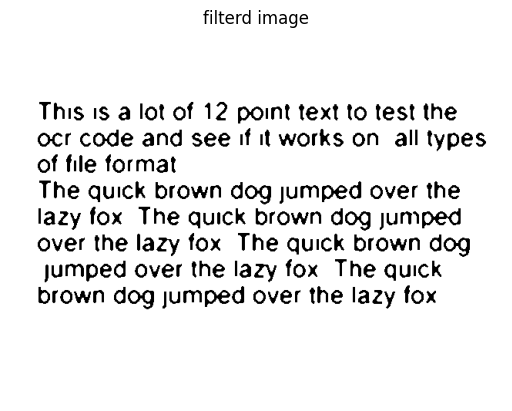

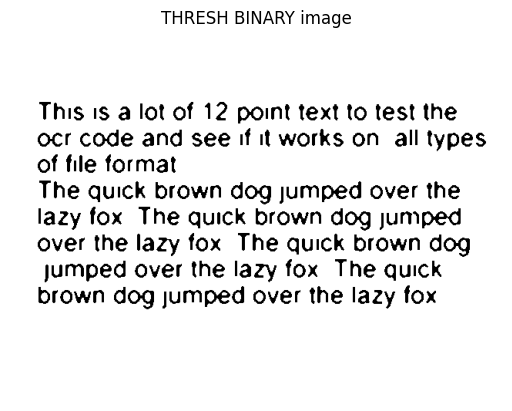

In [11]:
# gray_image = cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB)
# plt.imshow(gray_image, cmap = 'gray')
# plt.axis('off')
# plt.show()

img_dis(gray_image, 'gray image')

img_dis(den_image, 'den image')

img_dis(Sharpen_img, 'filterd image')

img_dis(bin_img, 'THRESH BINARY image')


In [12]:
# def display_img(img, title, is_rgb=False):
#   if is_rgb:
#     cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     plt.imshow(img)
#   else:
#     plt.imshow(img, cmap='gray')
#   plt.title(title)
#   plt.axis('off')
#   plt.show()

## Get the OCR model using keras_ocr
Create a keras_ocr pipeline, to handle text detection and recognition using pre-trained model.

In [13]:
from keras_ocr.pipeline import Pipeline

In [14]:
pipeline = Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


## Perform OCR on the image
Runs the OCR pipeline on the preprocessed image and extracts text.

In [17]:
img_path = '/content/OCR_example.png'
img = keras_ocr.tools.read(img_path)

images = [img]

pre_gro = pipeline.recognize(images)


2/2 [==============================] - 20s 8s/step


In [18]:
pre_gro #this to see where is the text  in array

[[('12',
   array([[248.,  89.],
          [284.,  89.],
          [284., 119.],
          [248., 119.]], dtype=float32)),
  ('this',
   array([[ 35.,  90.],
          [ 98.,  90.],
          [ 98., 118.],
          [ 35., 118.]], dtype=float32)),
  ('of',
   array([[210.,  91.],
          [241.,  91.],
          [241., 118.],
          [210., 118.]], dtype=float32)),
  ('point',
   array([[291.46222 ,  93.44577 ],
          [366.61285 ,  88.32185 ],
          [368.69977 , 118.929565],
          [293.54913 , 124.05348 ]], dtype=float32)),
  ('the',
   array([[534.,  91.],
          [583.,  91.],
          [583., 118.],
          [534., 118.]], dtype=float32)),
  ('is',
   array([[106.,  92.],
          [131.,  92.],
          [131., 118.],
          [106., 118.]], dtype=float32)),
  ('lot',
   array([[166.,  92.],
          [204.,  92.],
          [204., 118.],
          [166., 118.]], dtype=float32)),
  ('text',
   array([[372.,  92.],
          [431.,  92.],
          [431., 118.],
 

## Display the OCR predictions
The predictions made by the keras_ocr pipeline are stored in a variable. You should inspect the recognized text and do the following:
* You should print the detected texts in the image.
* You can also use `keras_ocr.tools.drawAnnotations()` to visualize the extracted text.

In [19]:
for pres in pre_gro:
  for pre in pres:
    print(pre[0])

12
this
of
point
the
is
lot
text
to
test
a
code
and
if
it
works
all
types
see
ocr
on
of
format
file
the
quick
brown
dog
jumped
the
over
the
quick
dog
jumped
fox
brown
lazy
the
the
quick
dog
lazy
fox
brown
over
quick
jumped
the
the
fox
lazy
over
dog
jumped
the
fox
brown
lazy
over


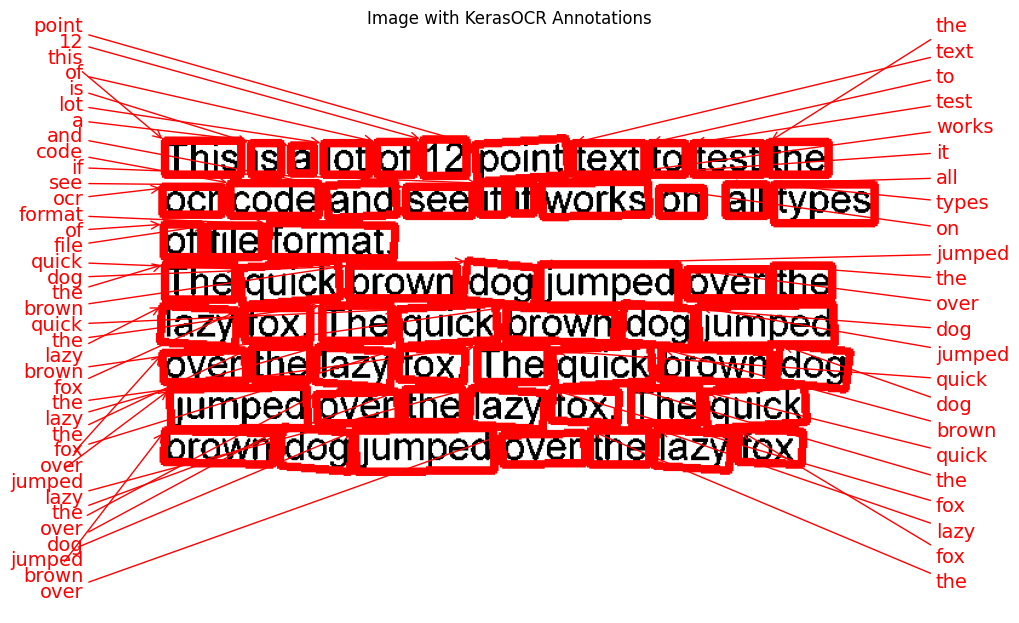

In [25]:
fig, ax = plt.subplots(figsize=(10, 10))
keras_ocr.tools.drawAnnotations(image= images[0], predictions=pre_gro[0],ax=ax)

plt.title("Image with KerasOCR Annotations")
plt.axis('off')
plt.show()